In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [126]:
lianjia = pd.read_csv("F:/05seaborn/lianjia.csv")
lianjia = lianjia.drop(["UnitPrice"],axis=1)
# lianjia.info()  #查看基本数据信息

In [3]:
lianjia.describe() # 查看数据基本统计信息

,Num,Price,Size,Year
count,1710.000000,1710.000000,1707.000000,1703.0
mean,854.500000,662.395906,101.553175,1995.0
std,493.778797,573.139962,47.897599,0.0
min,0.000000,70.000000,26.080000,1995.0
25%,427.250000,305.000000,70.135000,1995.0
50%,854.500000,459.000000,90.140000,1995.0
75%,1281.750000,830.000000,124.940000,1995.0
max,1709.000000,6300.000000,407.760000,1995.0


In [4]:
lianjia_df = lianjia.copy()
lianjia_df["UnitPrice"] = lianjia_df["Price"] / lianjia_df['Size']

In [39]:
columns = ['Region', 'Direction', 'Garden', 'Layout', 'Floor', 
           'Year', 'Size', 'Elevator','Direction', 'Renovation', 'UnitPrice', 'Price']
df = pd.DataFrame(lianjia_df, columns=columns)       

In [129]:
# 对二手房分组， 对比二手房数量和每平米房价
df_house_count = df.groupby("Region")["Price"].count().sort_values(
    ascending=False).to_frame().reset_index()
df_house_mean = df.groupby("Region")["UnitPrice"].mean().sort_values(
    ascending=False).to_frame().reset_index()

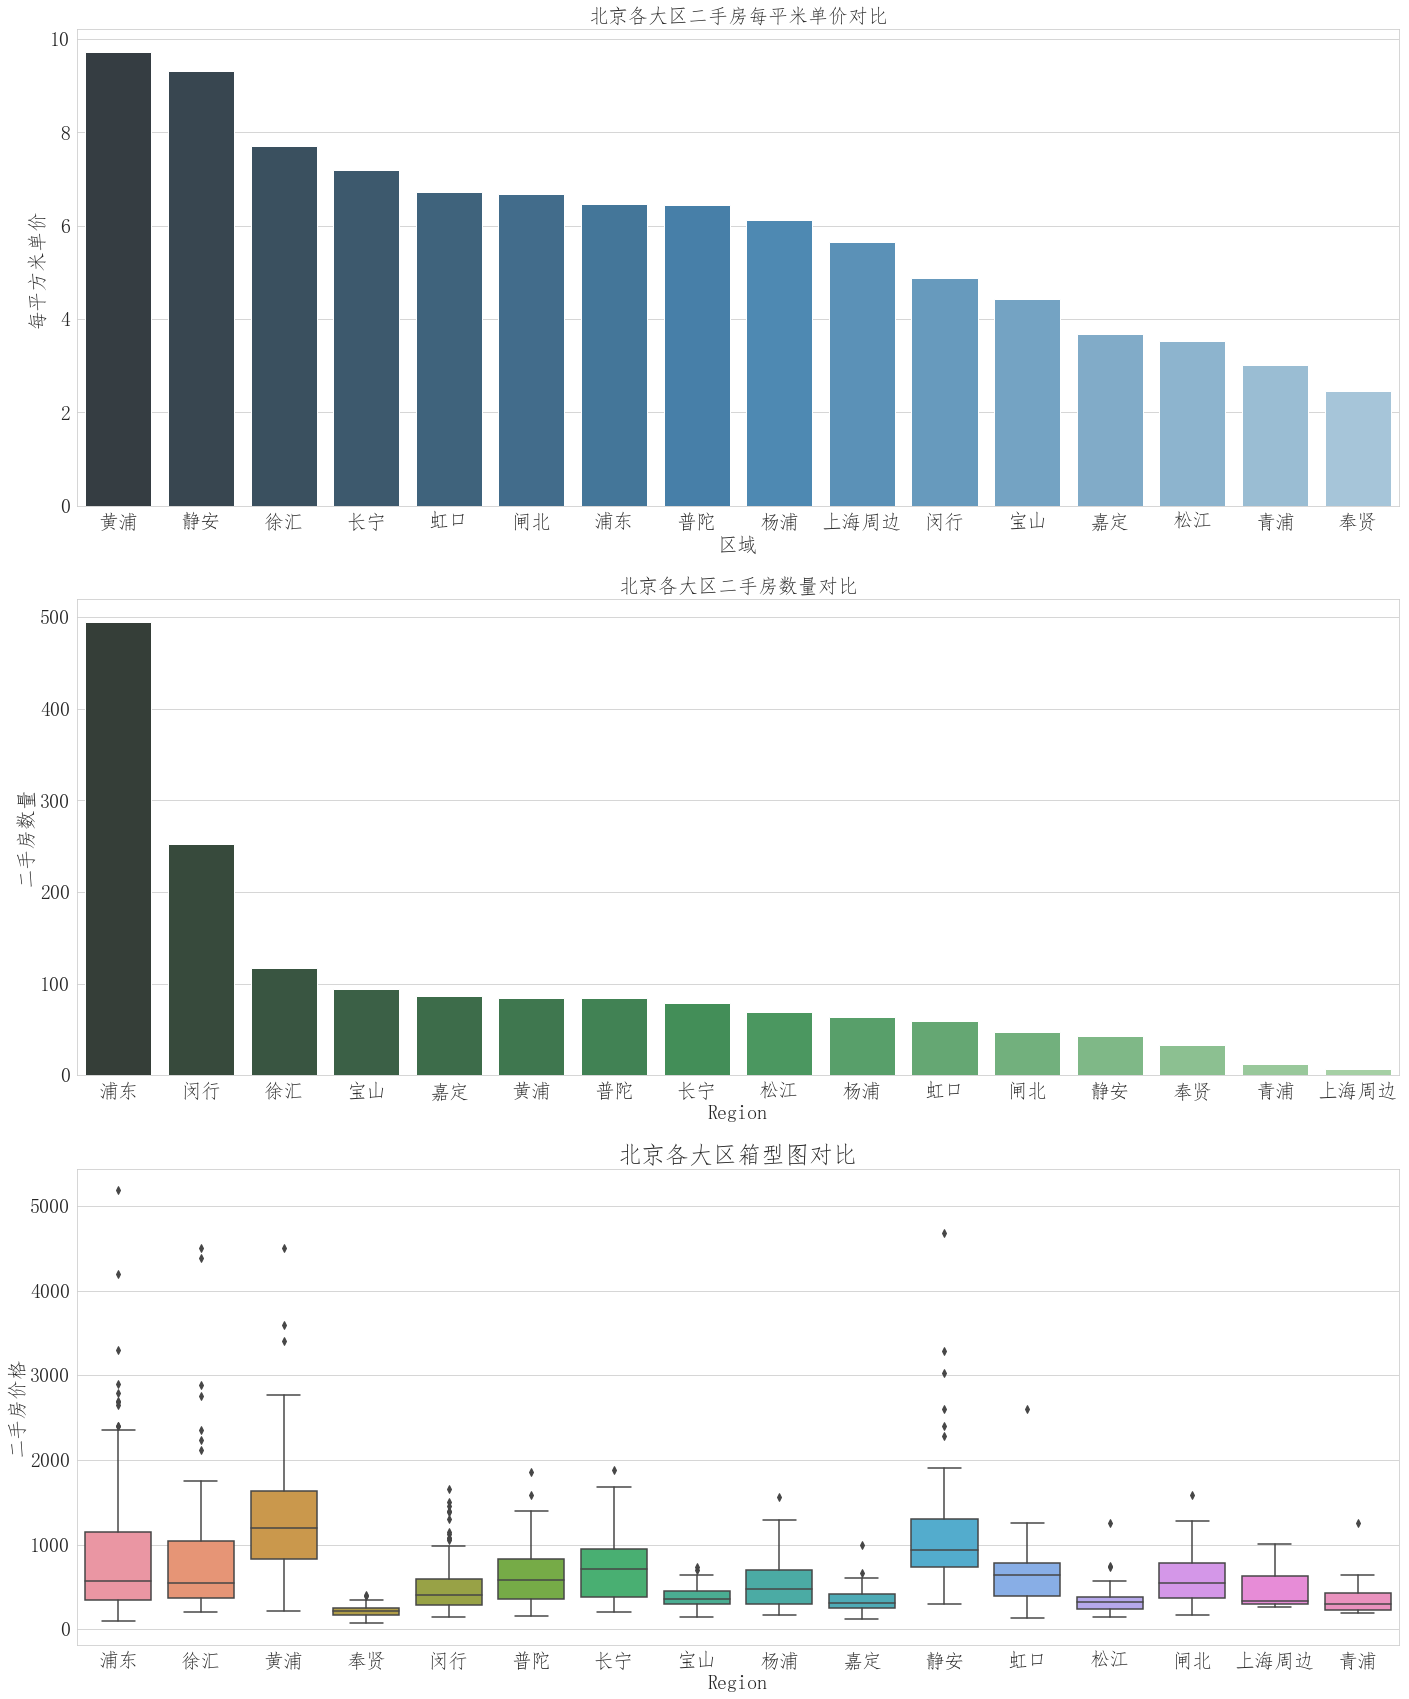

In [130]:
# Region 特征分析
sns.set_style("whitegrid")
plt.style.use("rbp")
f, [ax1,ax2,ax3] = plt.subplots(3,1,figsize=(20,24))
sns.barplot(x='Region', y="UnitPrice",data=df_house_mean,palette="Blues_d", ax=ax1)
ax1.set_title("北京各大区二手房每平米单价对比", fontsize=20)
ax1.set_xlabel("区域")
ax1.set_ylabel("每平方米单价")

sns.barplot(x='Region', y="Price", palette="Greens_d",data=df_house_count,ax=ax2)
ax2.set_title("北京各大区二手房数量对比", fontsize=20)
ax2.set_xlabel("Region")
ax2.set_ylabel("二手房数量")

sns.boxplot(x="Region", y="Price",data=df, ax=ax3)
ax3.set_title("北京各大区箱型图对比")
ax3.set_xlabel("Region")
ax3.set_ylabel("二手房价格")

f.tight_layout()
plt.show()

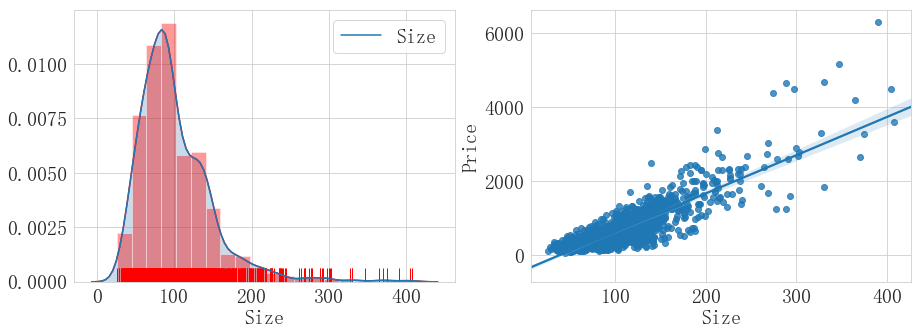

In [8]:
f,[ax1,ax2] = plt.subplots(1,2,figsize=(15,5))
# 二手房面价的分布情况
sns.distplot(df["Size"].dropna(), bins=20, ax=ax1,color="r",rug=True) #rug=True,
sns.kdeplot(df["Size"].dropna(), shade=True, ax=ax1)

# 二手房面积和价格的关系
sns.regplot(x='Size', y="Price", data=df, ax=ax2)

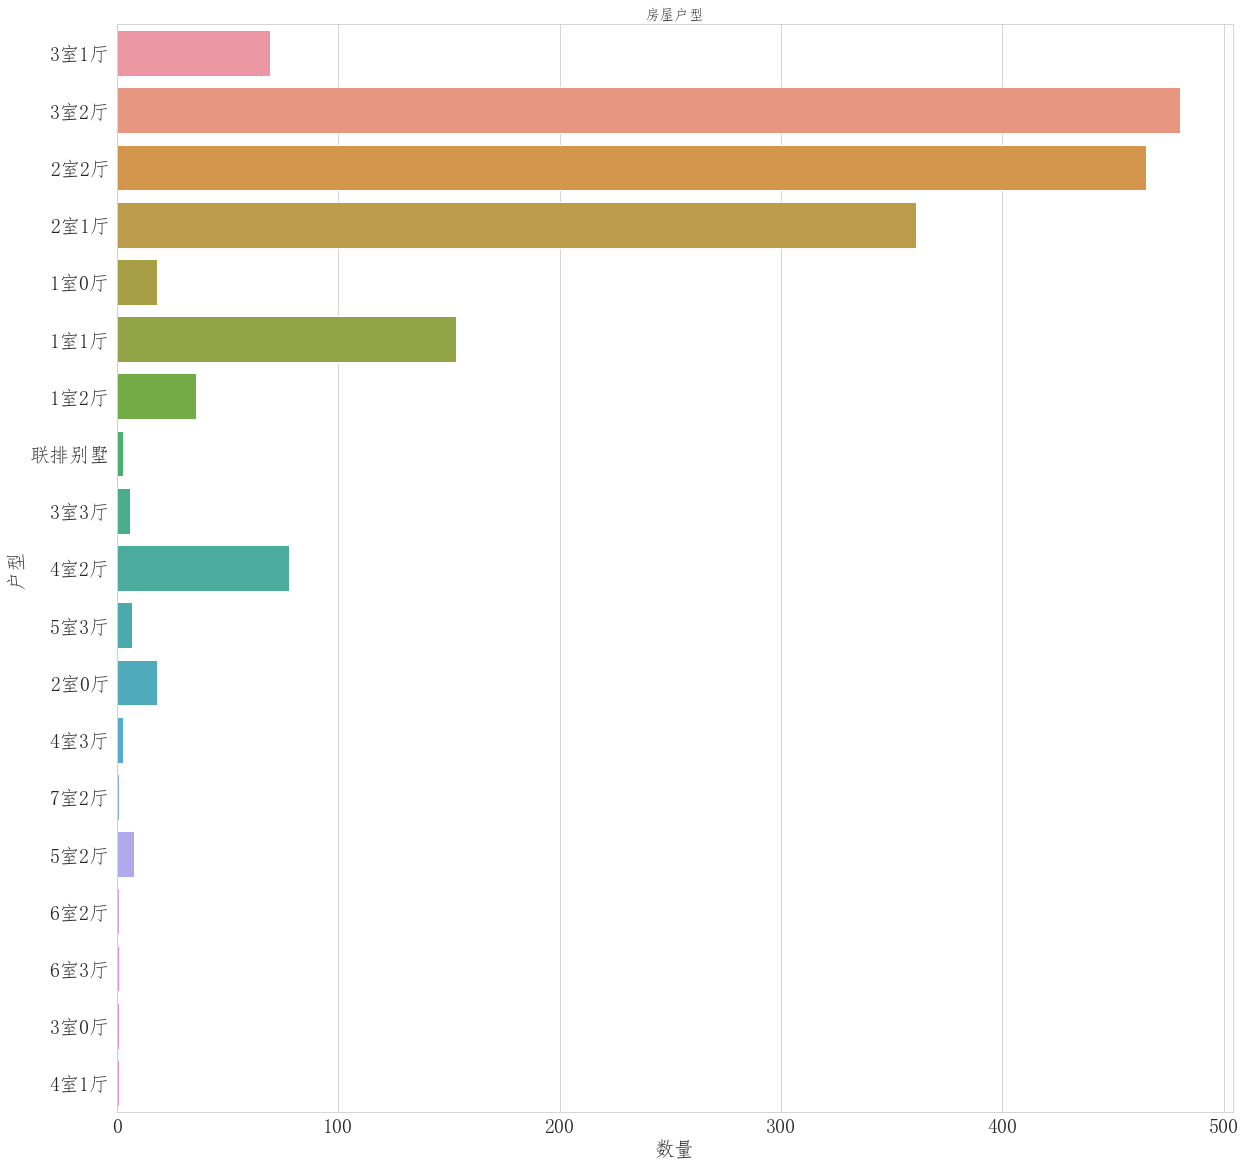

In [9]:
# Layout 特诊分析
f,ax1 = plt.subplots(figsize=(20,20))
sns.countplot(y="Layout", data=df, ax=ax1)
ax1.set_title("房屋户型", fontsize=15)
ax1.set_xlabel("数量")
ax1.set_ylabel("户型")
plt.show()

In [10]:
# df["Layout"].value_counts()
# Renovation  特征分析
df["Renovation"].value_counts().to_frame()

,Renovation
精装,902
简装,425
毛坯,196
其他,184
南,2
南北,1


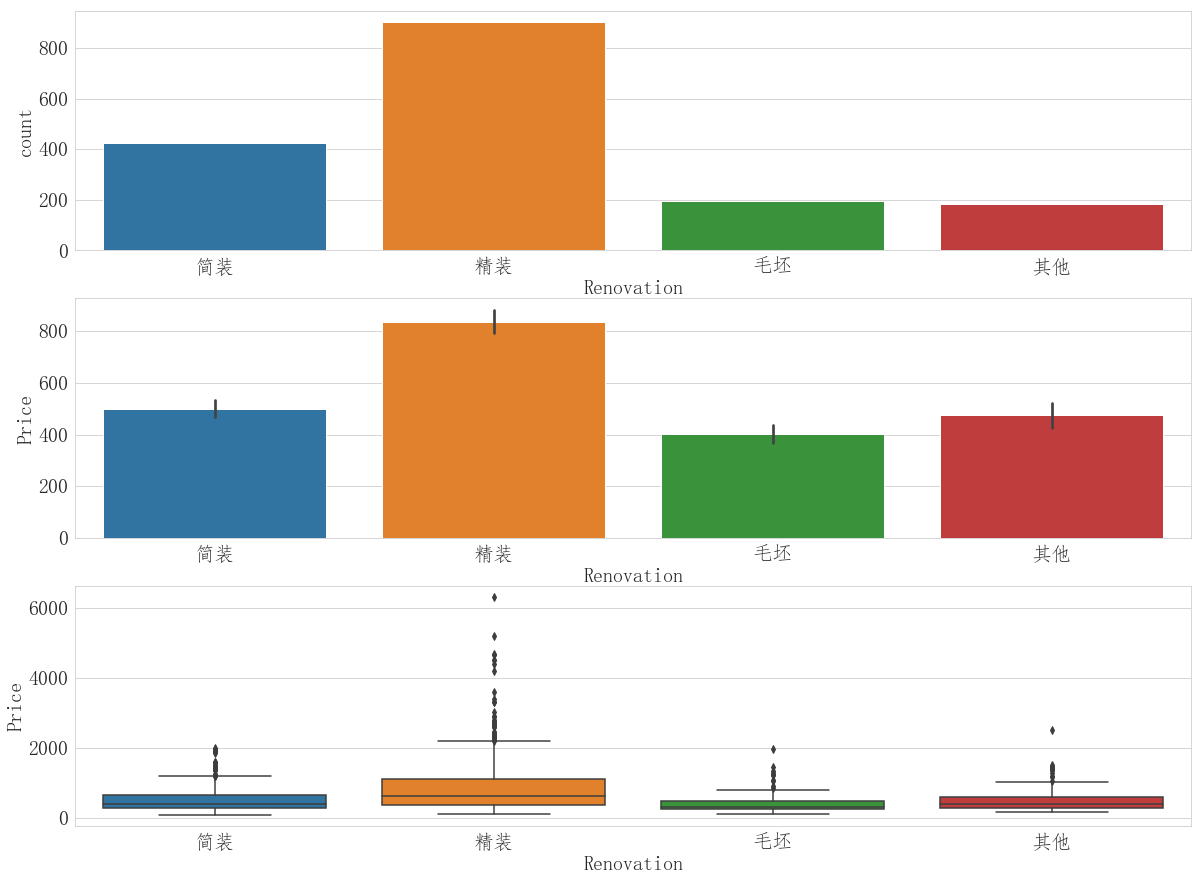

In [25]:
# 去掉错误数据“南北”,"南"，需要清除或替换
df['Renovation'] = df.loc[(df['Renovation'] != '南北'), 'Renovation']
df['Renovation'] = df.loc[(df['Renovation'] != '南'), 'Renovation']
fg, [ax1,ax2,ax3] = plt.subplots(3,1,figsize=(20,15))
sns.countplot(x="Renovation", data=df, ax=ax1)
sns.barplot(x="Renovation",y="Price", data=df, ax=ax2) #, ci=False
sns.boxplot(x="Renovation", y="Price", data=df, ax=ax3)

In [93]:
# 由于存在个别类型错误，如简装和精装，特征值错位，故需要移除
# df = df.loc[(df["Elevator"] == "有电梯")|(df["Elevator"] == "无电梯")]
df = df.loc[(df["Elevator"] == "有电梯") | (df["Elevator"] == "无电梯")]

In [102]:
#  正则提取数字
def num(strs):
    return [int(re.findall(r'\d+',str_)[0]) for str_ in strs]

In [103]:
# 填补Elevator缺失值
df["Layer_nums"] = num(df["Floor"])
df.loc[(df['Layer_nums']>6)&(df['Elevator'].isnull()), 'Elevator'] = '有电梯'
df.loc[(df['Layer_nums']<=6)&(df['Elevator'].isnull()), 'Elevator'] = '无电梯'

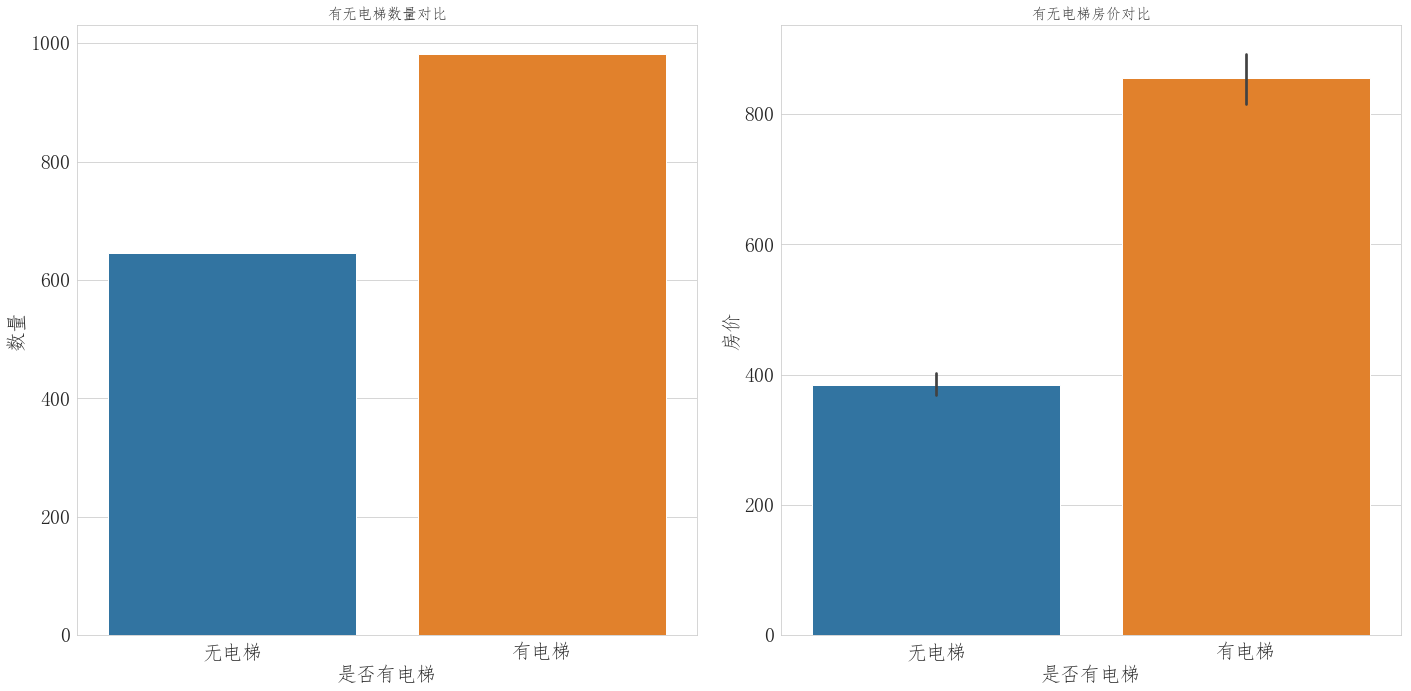

In [105]:
f, [ax1, ax2] = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x="Elevator", data=df, ax=ax1)
ax1.set_title("有无电梯数量对比", fontsize=15)
ax1.set_xlabel("是否有电梯")
ax1.set_ylabel("数量")

sns.barplot(x="Elevator", y="Price", data=df, ax=ax2)
ax2.set_title("有无电梯房价对比", fontsize=15)
ax2.set_xlabel("是否有电梯")
ax2.set_ylabel("房价")

plt.tight_layout()
plt.show()

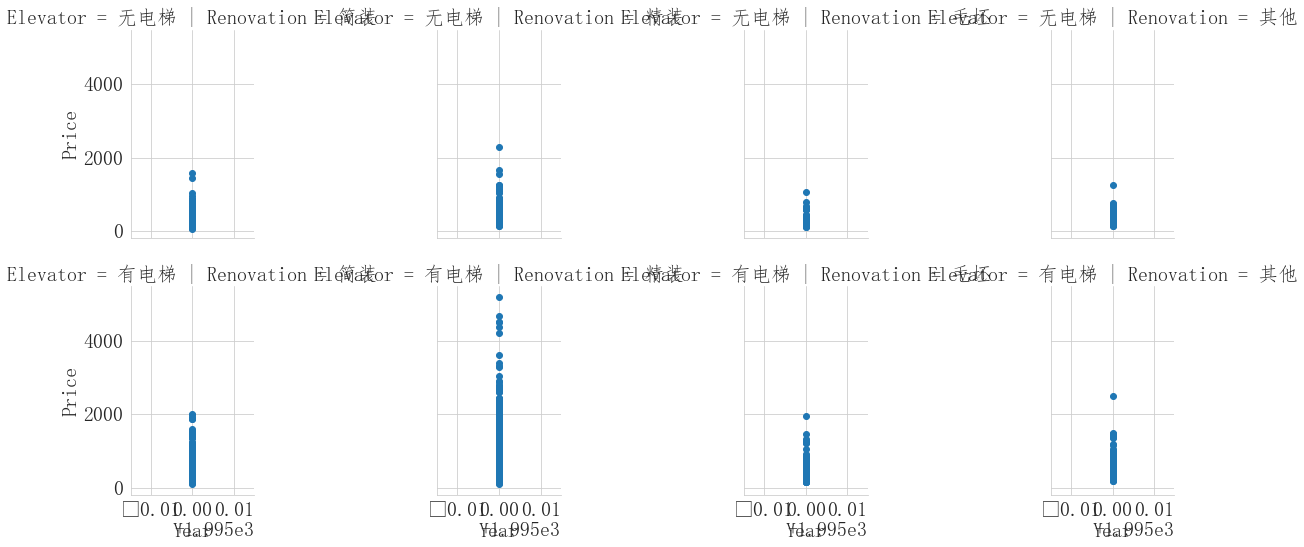

In [118]:
# Year 特征分析
grid = sns.FacetGrid(df, row="Elevator", col="Renovation",palette="seismic",height=4)
grid.map(plt.scatter, "Year", "Price")
grid.add_legend()

Text(0, 0.5, '户型')

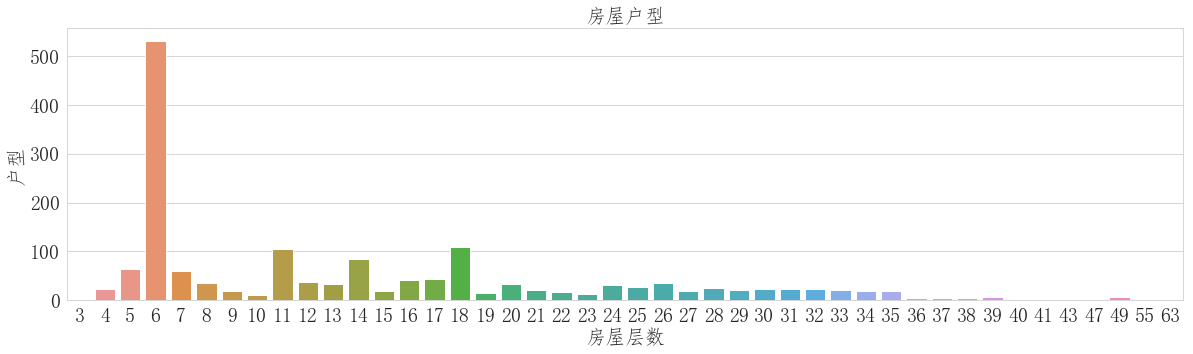

In [125]:
# Floor特征分析
f, ax1 = plt.subplots(figsize=(20,5))
sns.countplot(x="Layer_nums", data=df,ax=ax1)
ax1.set_title("房屋户型", fontsize=20)
ax1.set_xlabel("房屋层数")
ax1.set_ylabel("户型")